                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -26.45       -26.38    3.260e-12       -26.42
1        -30.11      -29.78*    8.407e-14       -29.98
2        -30.29       -29.70    7.036e-14       -30.05
3       -30.50*       -29.65   5.698e-14*      -30.15*
4        -30.41       -29.31    6.211e-14       -29.96
5        -30.46       -29.09    5.919e-14       -29.91
6        -30.42       -28.79    6.200e-14       -29.76
7        -30.33       -28.45    6.759e-14       -29.57
8        -30.27       -28.12    7.252e-14       -29.40
9        -30.16       -27.76    8.065e-14       -29.19
10       -30.24       -27.57    7.517e-14       -29.16
11       -30.21       -27.28    7.829e-14       -29.02
12       -30.20       -27.01    7.966e-14       -28.91
13       -30.16       -26.71    8.413e-14       -28.76
14       -30.12       -26.41    8.848e-14       -28.62
15       -

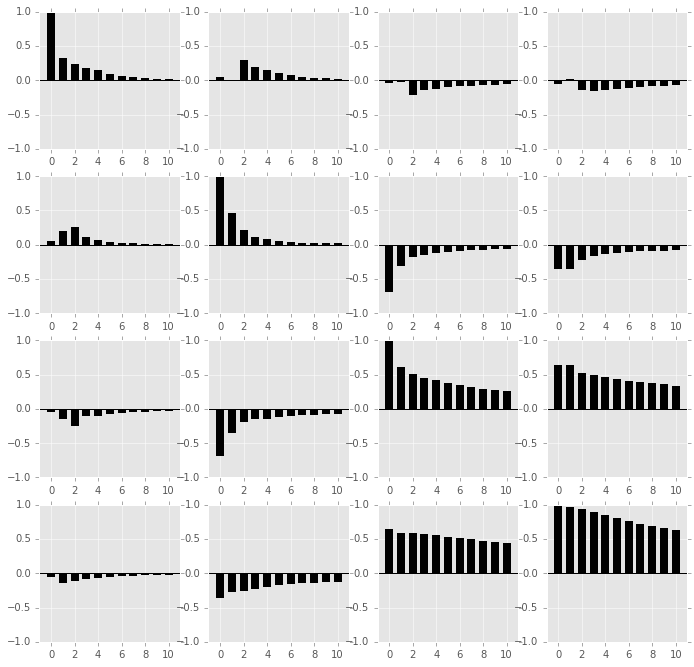

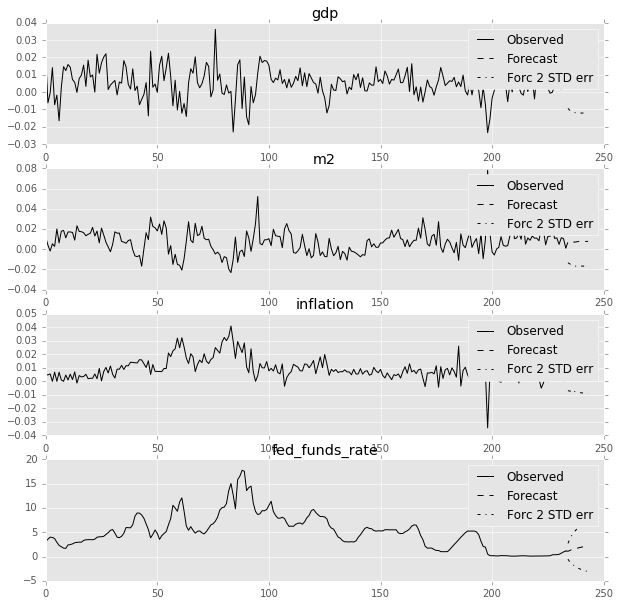

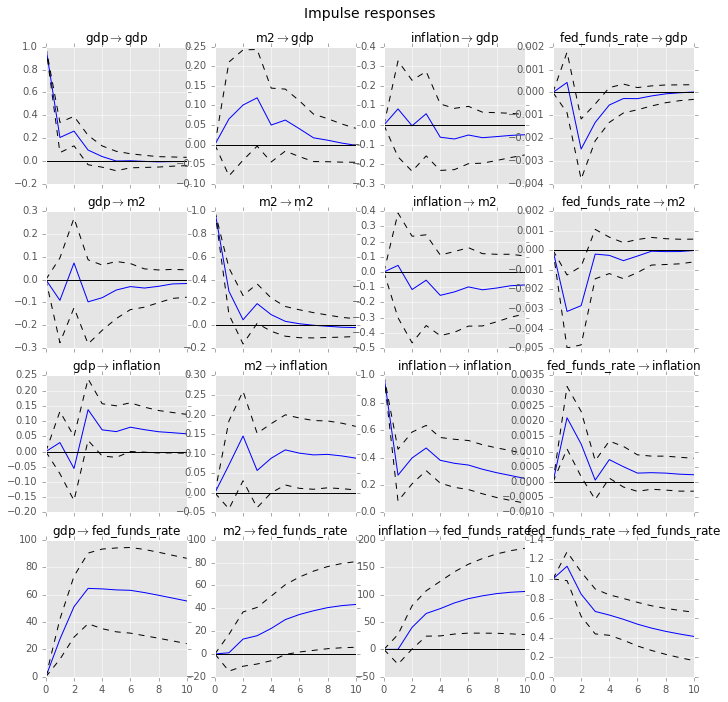

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
path = '/home/dennis/Uni/TimeSeries/Python'
%run '/home/dennis/Uni/TimeSeries/Python/PS2/helper.py'
os.chdir(path)
#from helper import *

In [3]:
# load data 
path = '/home/dennis/Uni/TimeSeries/Python/data/'
gdp = pd.read_csv(path +'RealGDPPerCapita.csv')
m2 = pd.read_csv(path + 'M2Real.csv')
fed_funds = pd.read_csv(path + 'fedFundsRate.csv')
cpi = pd.read_csv(path + 'cpi.csv')         

# convert data     
dfs = [gdp, m2, cpi, fed_funds]
gdp, m2, cpi, fed_funds = [convert_date_column(df) for df in dfs]
gdp, m2, inflation = [compute_growth_rate(df) for df in dfs[0:3]] 
dfs = [gdp, m2, inflation]
gdp, m2, inflation = [convert_to_quarterly(df) for df in dfs]
fed_funds = fed_funds.resample('Q').mean()


df_all = join_dfs_by_index([gdp, m2, inflation, fed_funds])
new_colnames = ["gdp", "m2", "inflation", "fed_funds_rate"]
df_all.columns =  new_colnames
df_all.head()

,gdp,m2,inflation,fed_funds_rate
DATE,,,,
1959-06-30,0.020405,0.011974,0.004826,3.083333
1959-09-30,-0.006202,0.004058,0.004802,3.576667
1959-12-31,-0.000467,-0.001765,0.005463,3.990000
1960-03-31,0.014121,0.005327,0.000002,3.933333
1960-06-30,-0.007307,0.002853,0.006789,3.696667


### Estimating VAR(2) Model
$Y_t = A_0 + A_1 Y_{t-1} + A_2 Y_{t-2} + U_t $

In [4]:
from statsmodels.tsa.api import VAR
model = VAR(df_all)
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Jan, 2018
Time:                     14:52:54
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.0142
Nobs:                     232.000    HQIC:                  -30.3333
Log likelihood:           2262.91    FPE:                5.40501e-14
AIC:                     -30.5490    Det(Omega_mle):     4.64173e-14
--------------------------------------------------------------------
Results for equation gdp
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.001468         0.001362            1.078           0.282
L1.gdp                    0.216883         0.065933            3.289           0.001
L1.m2                     0.075038         0.0

### Selecting optimal lag order
Measures AIC, BIC, FPE and HQIC

In [5]:
model.select_order(30)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -26.45       -26.38    3.260e-12       -26.42
1        -30.11      -29.78*    8.407e-14       -29.98
2        -30.29       -29.70    7.036e-14       -30.05
3       -30.50*       -29.65   5.698e-14*      -30.15*
4        -30.41       -29.31    6.211e-14       -29.96
5        -30.46       -29.09    5.919e-14       -29.91
6        -30.42       -28.79    6.200e-14       -29.76
7        -30.33       -28.45    6.759e-14       -29.57
8        -30.27       -28.12    7.252e-14       -29.40
9        -30.16       -27.76    8.065e-14       -29.19
10       -30.24       -27.57    7.517e-14       -29.16
11       -30.21       -27.28    7.829e-14       -29.02
12       -30.20       -27.01    7.966e-14       -28.91
13       -30.16       -26.71    8.413e-14       -28.76
14       -30.12       -26.41    8.848e-14       -28.62
15       -

{'aic': 3, 'bic': 1, 'fpe': 3, 'hqic': 3}

AIC, FPE and HQIC suggest lag order 3 while BIC indicate lag order 1 is more optimal. We choose 3. Thus our model is $Y_t = A_0 + A_1 Y_{t-1} + A_2 Y_{t-2} + A_3 Y_{t-3} + U_t $

In [7]:
result = model.fit(3)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Jan, 2018
Time:                     15:00:22
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -29.9522
Nobs:                     231.000    HQIC:                  -30.4145
Log likelihood:           2289.88    FPE:                4.52486e-14
AIC:                     -30.7271    Det(Omega_mle):     3.63491e-14
--------------------------------------------------------------------
Results for equation gdp
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.001096         0.001395            0.786           0.433
L1.gdp                    0.205331         0.067525            3.041           0.003
L1.m2                     0.065583         0.0

Getting Parameters and Residuals: 
